# Data Storytelling with Google Playstore Games
The data set is from Kaggle.  https://www.kaggle.com/dhruvildave/top-play-store-games This set is a data set of the top 100 games for each type of games on Google Play STore along with rating and price and number of installs.   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import os

## Loading Data

In [5]:
df=pd.read_csv('Data/android_games.csv')

In [6]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


(1730, 15)

## Exploratory Data Analysis
### rough cleaning data

In [8]:
df['category']=df['category'].str.split(' ').str[1]

In [9]:
df['category'].value_counts()

CARD           126
WORD           104
CASINO         100
ARCADE         100
ACTION         100
ROLE           100
CASUAL         100
SPORTS         100
ADVENTURE      100
STRATEGY       100
EDUCATIONAL    100
RACING         100
SIMULATION     100
MUSIC          100
BOARD          100
PUZZLE         100
TRIVIA         100
Name: category, dtype: int64

In [10]:
df['installs']=df['installs'].apply(
    lambda x: float(x.split(" ")[0])*1000000 if "M" in x else float(x.split(" ")[0])*100000)

In [11]:
df['installs'].value_counts()

1.000000e+07    808
5.000000e+07    267
5.000000e+06    245
1.000000e+08    204
1.000000e+06    192
5.000000e+08     12
1.000000e+09      2
Name: installs, dtype: int64

In [12]:
df['total ratings'].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

##  Visualizations

In [13]:
df['category'].value_counts()

CARD           126
WORD           104
CASINO         100
ARCADE         100
ACTION         100
ROLE           100
CASUAL         100
SPORTS         100
ADVENTURE      100
STRATEGY       100
EDUCATIONAL    100
RACING         100
SIMULATION     100
MUSIC          100
BOARD          100
PUZZLE         100
TRIVIA         100
Name: category, dtype: int64

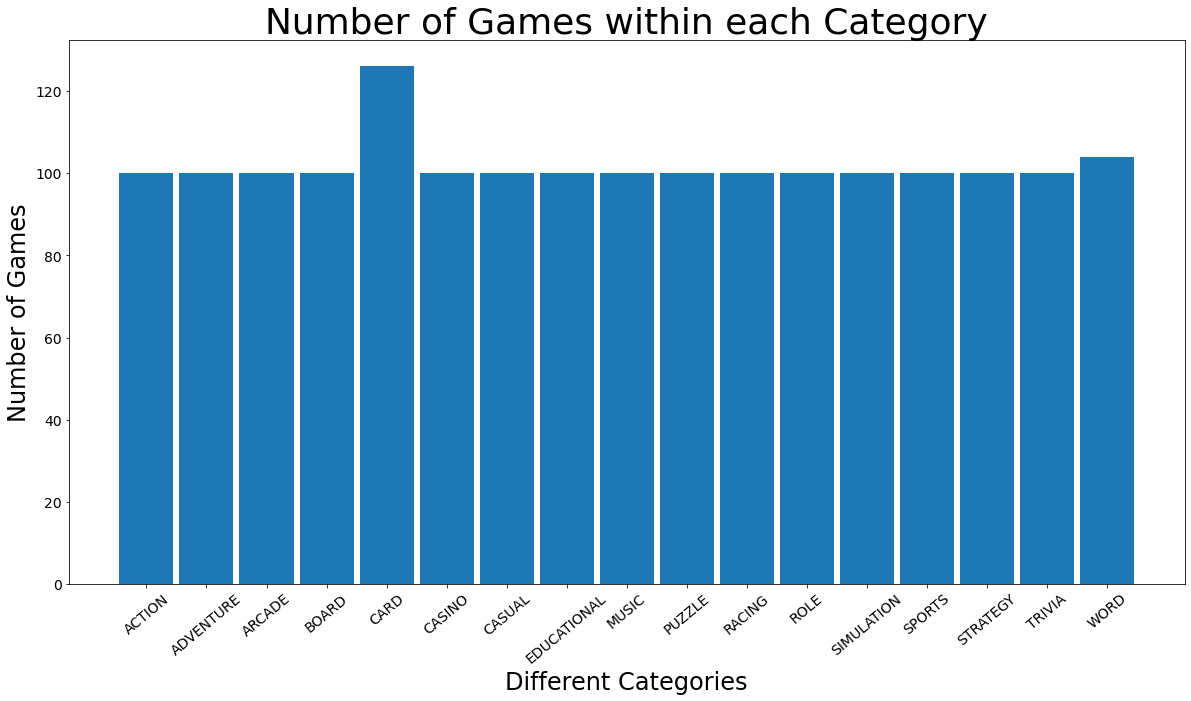

In [146]:
plt.figure(figsize=(20,10))
plt.hist(df['category'], bins=np.arange(18)-0.5, rwidth=0.9)
plt.title('Number of Games within each Category', fontsize=36)
plt.ylabel('Number of Games', fontsize=24)
plt.xlabel('Different Categories', fontsize=24)
plt.xticks(rotation=40,fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('.../Data_storytelling/figures/games_category')

### Paid vs not paid

In [15]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

In [16]:
df['installs_mil']=df['installs']/1000000

In [17]:
df['installs_mil'].describe()

count    1730.000000
mean       29.622543
std        60.250828
min         1.000000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_mil, dtype: float64

In [18]:
df['installs'].describe()

count    1.730000e+03
mean     2.962254e+07
std      6.025083e+07
min      1.000000e+06
25%      5.000000e+06
50%      1.000000e+07
75%      5.000000e+07
max      1.000000e+09
Name: installs, dtype: float64

In [19]:
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/Data_storytelling'

### Number of games that were free and number of games that were free

In [21]:
x=df['paid']
df['paid1']=(df['paid']==True).astype(int)

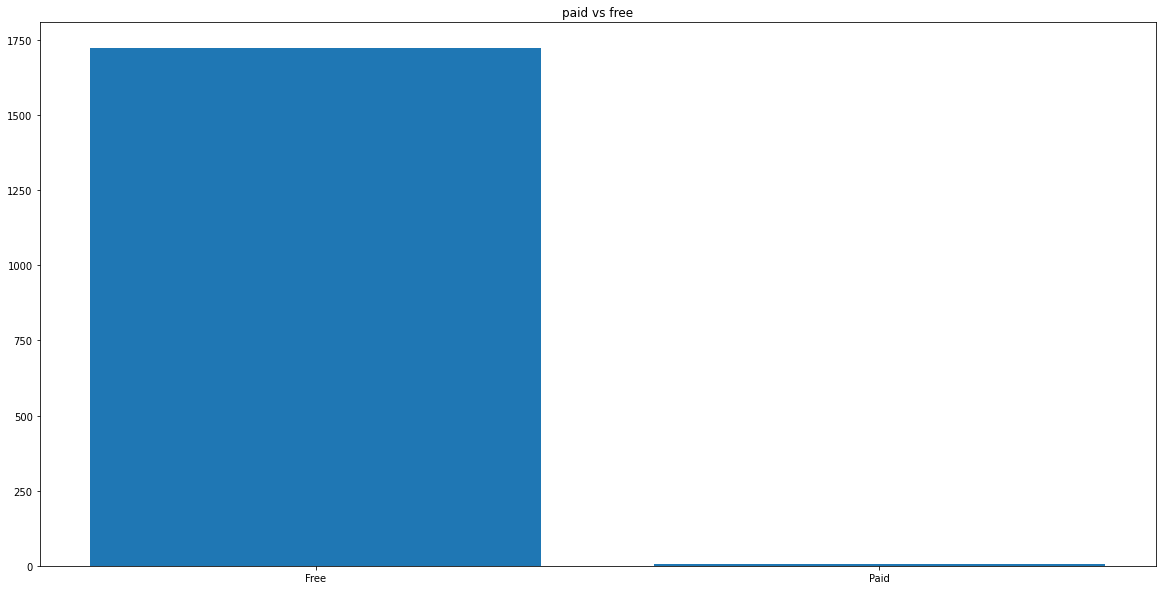

In [169]:
plt.figure(figsize=(20,10))
plt.hist(df['paid1'], bins=np.arange(3)-0.5, label=['free','paid'],rwidth=.8)
plt.title('paid vs free')
plt.xticks((np.arange(2)), labels=['Free','Paid'])
plt.savefig('.../Data_storytelling/figures/hist_gamespaidvsfree.svg')

box plot paid vs free

In [106]:
free=df[df['paid']==False][['installs_mil']]
cost=df[df['paid']==True][['installs_mil']]
pdvsfr=df[['paid','installs_mil']]

In [124]:
free.shape

(1723, 1)

In [126]:
cost.shape

(7, 1)

In [137]:
cost['installs_mil'].describe()

count     7.000000
mean     17.571429
std      22.515603
min       1.000000
25%       1.000000
50%      10.000000
75%      30.000000
max      50.000000
Name: installs_mil, dtype: float64

In [133]:
df['installs_mil'].describe()

count    1730.000000
mean       29.622543
std        60.250828
min         1.000000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_mil, dtype: float64

Boxplot of paid installs per million

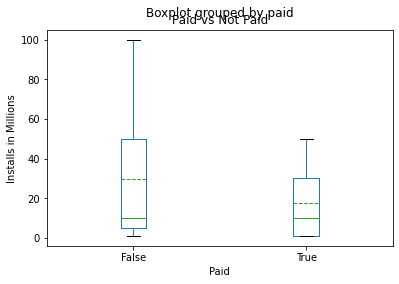

In [170]:
#fig,ax1=plt.subplots(figsize=(10,20))
ax1 = pdvsfr.boxplot(by='paid', meanline=True, showmeans=True, grid= False, showfliers=False, labels=['Free','Paid'])
#ax1.yaxis.grid(False)
#ax1.xaxis.grid(False)
ax1.set_title('Paid vs Not Paid')
ax1.set_xlabel('Paid')
ax1.set_ylabel('Installs in Millions')
plt.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/boxplot_PaidvsFree.svg')

Number of games in each category

In [24]:
free=df[df['paid']==False][['installs_mil','category']]
cost=df[df['paid']==True][['installs_mil','category']]

In [28]:
free['installs_mil'].value_counts()

10.0      806
50.0      265
5.0       245
100.0     204
1.0       189
500.0      12
1000.0      2
Name: installs_mil, dtype: int64

In [183]:
cate=df['category'].value_counts()
cate_lbl=df['category'].unique()

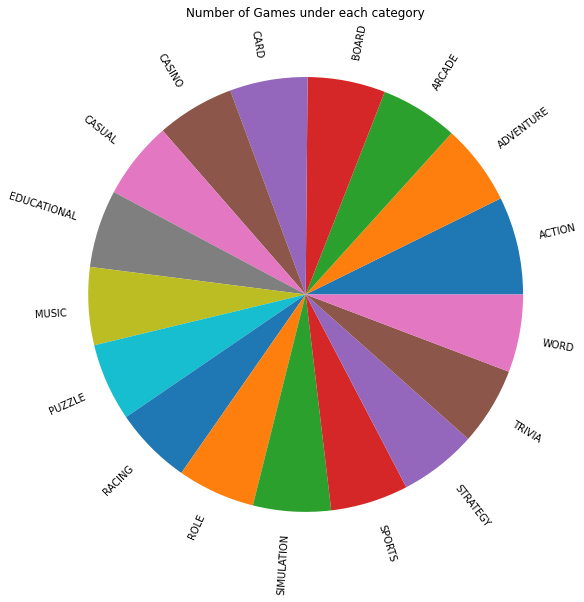

In [190]:
plt.figure(figsize=(10,10))
plt.pie(cate, labels=cate_lbl, rotatelabels=40,)
plt.title('Number of Games under each category')
plt.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/piechartcat.svg')

Average Ratings per Categories

In [148]:
df['average rating'].describe()

count    1730.000000
mean        3.908092
std         0.290973
min         2.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: average rating, dtype: float64

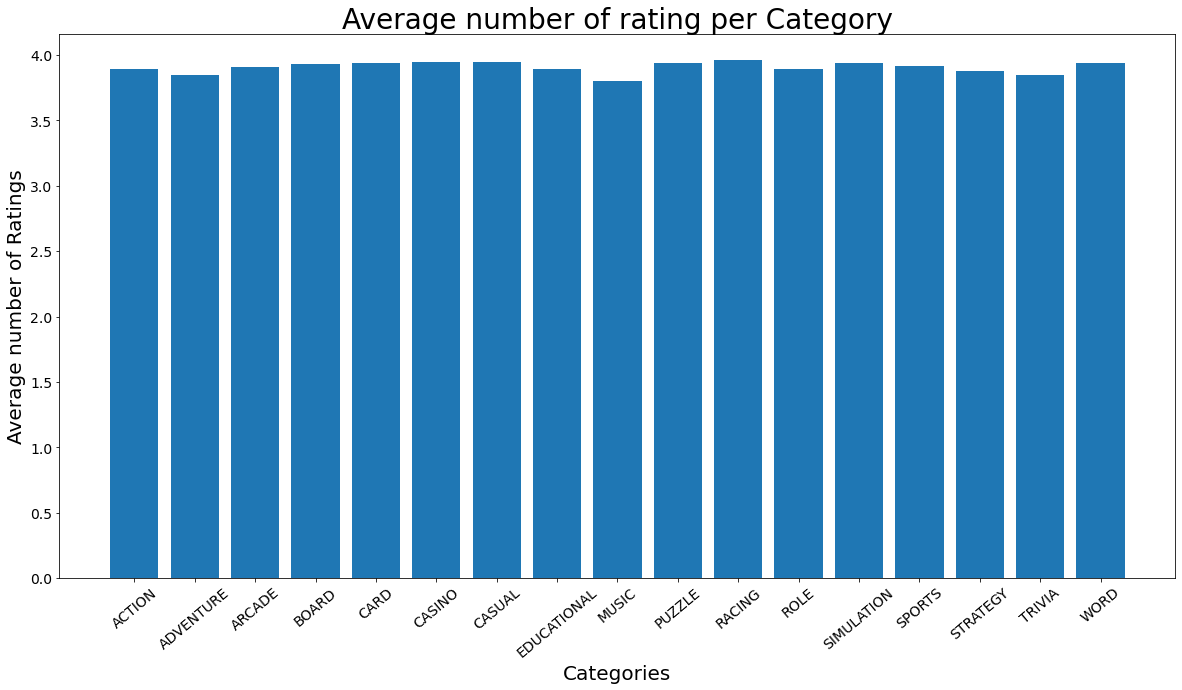

In [154]:
avgrate=df.groupby(['category'])['average rating'].mean()
category=df['category'].unique()
plt.figure(figsize=(20,10))
plt.bar(category, avgrate)
plt.title('Average number of rating per Category', fontsize=28)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Average number of Ratings', fontsize=20)
plt.xticks(rotation=40,fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/averageratedpercategory')

In [152]:
df['total ratings'].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

The average number of ratings per category

<ipython-input-256-4684328c2107>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(category, avgrate, Color='purple')


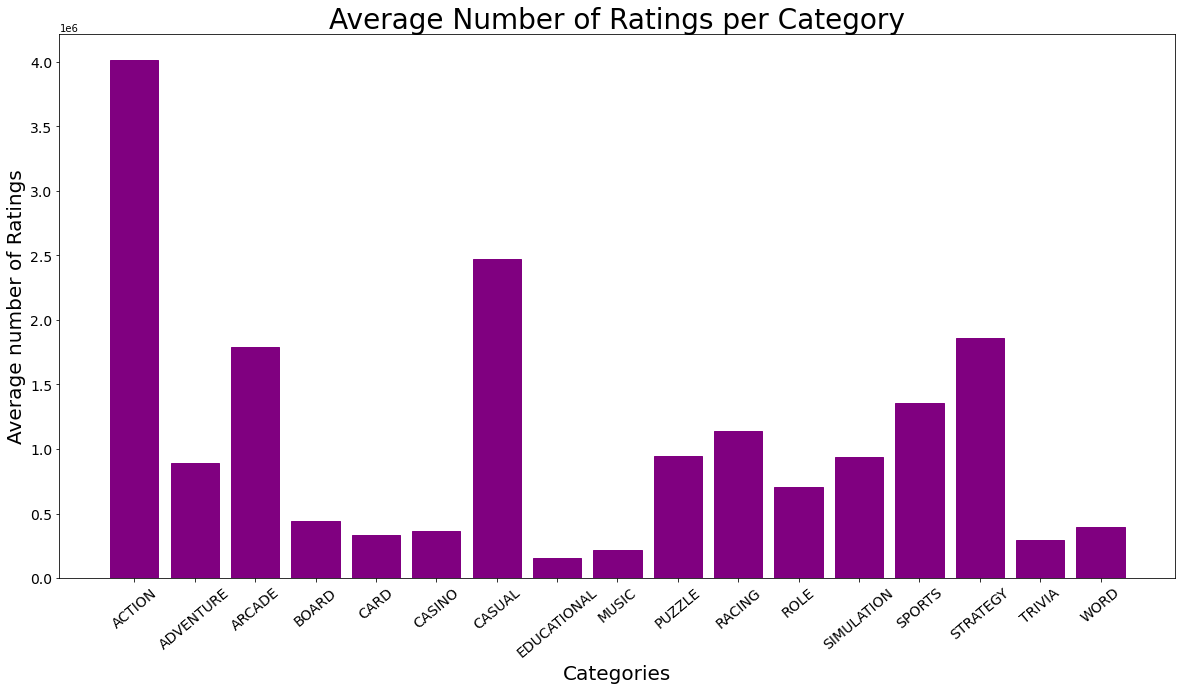

In [256]:
avgrate=df.groupby(['category'])['total ratings'].mean()
category=df['category'].unique()
plt.figure(figsize=(20,10))
plt.bar(category, avgrate, Color='purple')
plt.title('Average Number of Ratings per Category', fontsize=28)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Average number of Ratings', fontsize=20)
plt.xticks(rotation=40,fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/avgcount_rate_bar.svg')

In [34]:
df['title'].value_counts()

Solitaire                                             36
Word Search                                            9
Spider Solitaire                                       7
Bubble Shooter                                         4
The Simpsons™: Tapped Out                              2
                                                      ..
Heroes of Camelot                                      1
Ludo All Star - Play Online Ludo Game & Board Game     1
Megapolis: city building simulator. Urban strategy     1
Lords Mobile: Tower Defense                            1
House of Fun: Play Casino Slots                        1
Name: title, Length: 1675, dtype: int64

In [35]:
catdf=df.groupby(['category','paid']).agg(totalinstall=('installs_mil','sum'))
catdf=catdf.reset_index()

Total installs in millions per category

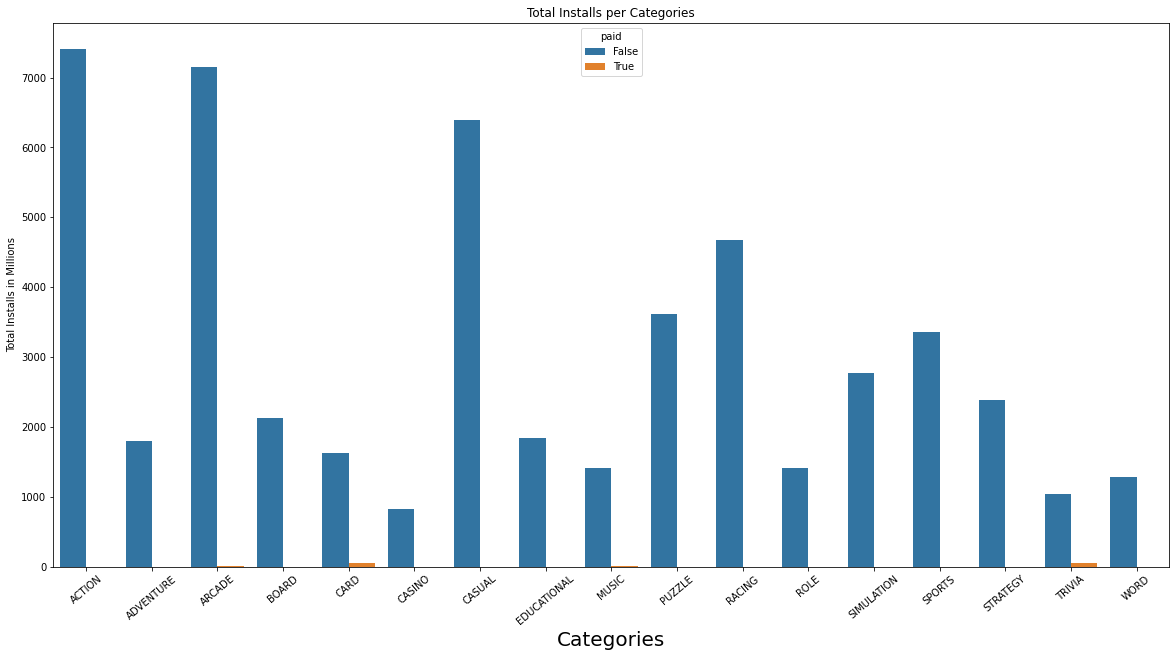

In [207]:
fig,ax=plt.subplots(figsize=(20,10))
p=sns.barplot(x='category', y='totalinstall',hue='paid', data=catdf)


plt.xlabel('Categories', fontsize=20)
plt.ylabel('Total Installs in Millions')
plt.xticks(rotation=40)
plt.title('Total Installs per Categories')
fig=p.get_figure()
#plt.show(p)
fig.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/ttlcat.svg')

### average installs per game in each category

In [209]:
catdf=df.groupby(['category','paid']).agg(totalinstall=('installs_mil','mean'))
catdf=catdf.reset_index()

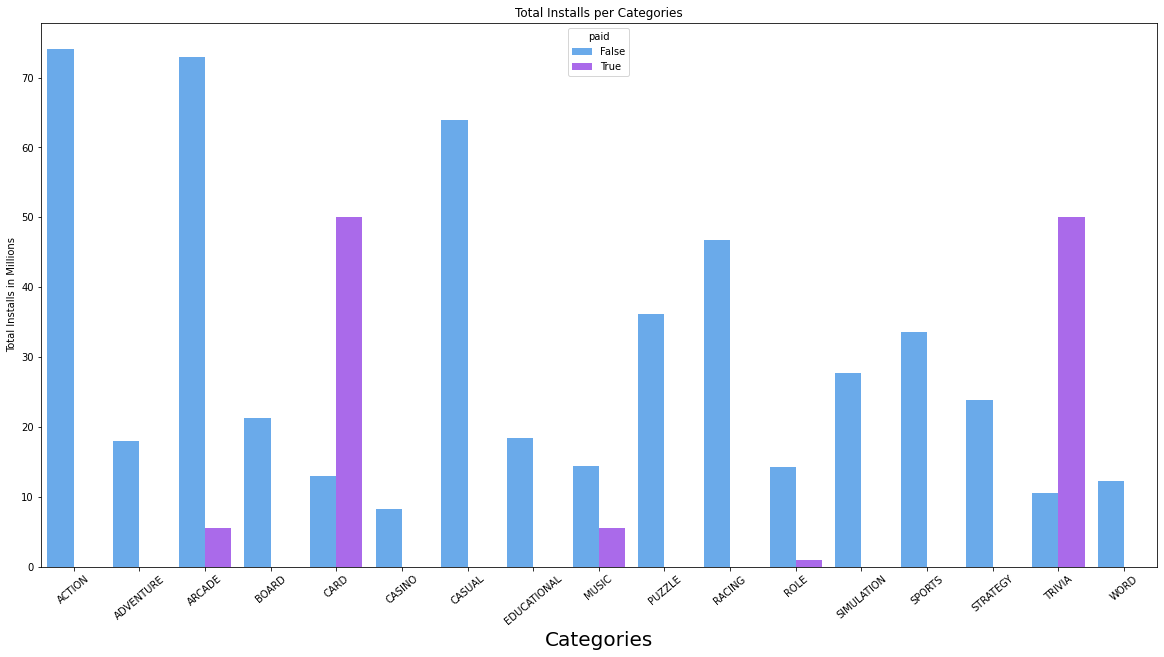

In [235]:
fig,ax=plt.subplots(figsize=(20,10))

p=sns.barplot(x='category', y='totalinstall',
              hue='paid', data=catdf, palette='cool')


plt.xlabel('Categories', fontsize=20)
plt.ylabel('Total Installs in Millions')
plt.xticks(rotation=40)
plt.title('Total Installs per Categories')
fig=p.get_figure()
#plt.show(p)
fig.savefig('/Users/andreafung/Dropbox/Springboard/Data_storytelling/figures/avginstalmil.svg')